In [48]:
import numpy as np
import os
from measurement import *
from analysis2 import *
from beta_vs_radius_plot import CompactFiberSolver
import matplotlib.pyplot as plt
import pandas as pd

# Alignment

### Get current position

In [56]:
print(stage_getpos())
print(piezo_getpos())

3500
{'x': -5.163854599, 'y': 70.36276245, 'z': 55.40992355}


### Move

In [177]:
# move motor
stage_move(2200)

2200

In [196]:
# move piezo
piezo_move(target_x=50, target_y=70, target_z=55)

{'x': 49.96986008, 'y': 70.00021362, 'z': 54.99536133}

# Z scan (Height axis)

In [189]:
res = measure_piezo_sweep(ID="test", scan_axis='z', scan_values=np.linspace(55, 65, 51), const_x=75.8, const_y=70)
path = res['npz_path']
res_ana = analyze_gaussian(path)
plt.show()

[rep 1/1] [1/51] z=55.000 um  elapsed=0.25s
[rep 1/1] [51/51] z=65.000 um  elapsed=11.30s
Data saved to: data\20251009_162456_test\20251009_162456_test_z.npz


In [173]:
print(res_ana["peak_position"])

57.195405798307675


# X scan (Radial axis)

In [198]:
res = measure_piezo_sweep(ID="test", scan_axis='x', scan_values=np.linspace(75, 76.2, 50), const_z=57.4, const_y=70)
path = res['npz_path']
res_ana = analyze_gaussian(path)
plt.show()

[rep 1/1] [1/50] x=75.000 um  elapsed=0.23s
[rep 1/1] [50/50] x=76.200 um  elapsed=5.90s
Data saved to: data\20251009_162848_test\20251009_162848_test_x.npz


# Y scan (Fiber axis)

## Single shot

### Measurement

In [165]:
res = measure_piezo_open(1, 10)

In [174]:
piezo_move(target_x=50, target_y=90, target_z=53)
filename = 'today_unlocked'
res = measure_piezo_open(1, 10)
with open(f'data/{filename}_.npy', 'wb') as f:
    np.save(f, res)

### Quick plot

In [ ]:
t, y = load_data("data/0_.npy", 2, 0, 5) # "filename", CH, start, stop

### Fitting

In [ ]:
results = analyze_snom_mi(
    filename="data/Test_scan_1480nm_/Test_2839.0_.npy",
    period_ms=500,
    start_time=0.18,
    end_time=0.22,
    save_prefix="500ms_100times_final_x62.80_fig",
    wavelength_nm=1388.25,
    save_csv="500ms_100times_final_x62.80_results.csv",
    show=False,
    n_rois=100,
    do_fft=False,
)

## Axial location dependence

### Parameters

In [ ]:
y_list_motor = np.linspace(2200, 2800, 7)
# x_list_pzt = [76, 76, 76.5, 76.7, 77, 77.6, 78]
# z_list_pzt = [55.7, 56.3, 56.7, 57.4, 57.7, 58.0, 58.5]

### Measurement

In [ ]:
y_list_motor = np.linspace(2200, 2800, 7)

x_pos_initial = 76.2
x_pos = x_pos_initial

z_pos_initial = 57.4
z_pos = z_pos_initial

piezo_move(target_x=0, target_y=70, target_z=70)
# Take the reference voltage
V_0 = acquire_V()

V_thresh = 0.05

for i, y_motor in enumerate(y_list_motor):
    piezo_move(target_x=0, target_y=70, target_z=70)
    stage_move(y_motor)
    time.sleep(0.5)

    # Z-scan
    res_0 = measure_piezo_sweep(ID='test', scan_axis='z', scan_values=np.linspace(z_pos-5, z_pos + 5, 50), const_x=x_pos, const_y=70)
    path = res_0['npz_path']
    res_ana = analyze_gaussian(path)

    # Find the peak position and move
    z_pos = res_ana['peak_position']
    piezo_move(target_x=x_pos, target_y=70, target_z=z_pos)

    V_i = acquire_V()

    while abs(V_i - V_0) < V_thresh:
        if abs(V_i - V_0) < V_thresh:
            x_pos = x_pos + 0.2
            piezo_move(target_x=x_pos, target_y=70, target_z=z_pos)
            V_i = acquire_V()

    filename = f'axial_dep_{i}_y{int(y_motor)}'
    res = measure_piezo_open(1, 100)
    with open(f'data/{filename}_.npy', 'wb') as f:
        np.save(f, res)

[rep 1/1] [1/50] z=42.400 um  elapsed=0.36s
[rep 1/1] [50/50] z=72.400 um  elapsed=11.26s
Data saved to: data\20251009_163406_test\20251009_163406_test_z.npz
[rep 1/1] [1/50] z=42.859 um  elapsed=0.25s
[rep 1/1] [50/50] z=72.859 um  elapsed=10.95s
Data saved to: data\20251009_163513_test\20251009_163513_test_z.npz
[rep 1/1] [1/50] z=42.859 um  elapsed=0.24s
[rep 1/1] [50/50] z=72.859 um  elapsed=10.88s
Data saved to: data\20251009_163525_test\20251009_163525_test_z.npz
[rep 1/1] [1/50] z=43.395 um  elapsed=0.24s
[rep 1/1] [50/50] z=73.395 um  elapsed=10.86s
Data saved to: data\20251009_163631_test\20251009_163631_test_z.npz
[rep 1/1] [1/50] z=43.395 um  elapsed=0.24s
[rep 1/1] [50/50] z=73.395 um  elapsed=11.00s
Data saved to: data\20251009_163644_test\20251009_163644_test_z.npz
[rep 1/1] [1/50] z=43.395 um  elapsed=0.24s
[rep 1/1] [50/50] z=73.395 um  elapsed=10.93s
Data saved to: data\20251009_163656_test\20251009_163656_test_z.npz
[rep 1/1] [1/50] z=43.395 um  elapsed=0.24s
[rep 1/1

### Quick plot

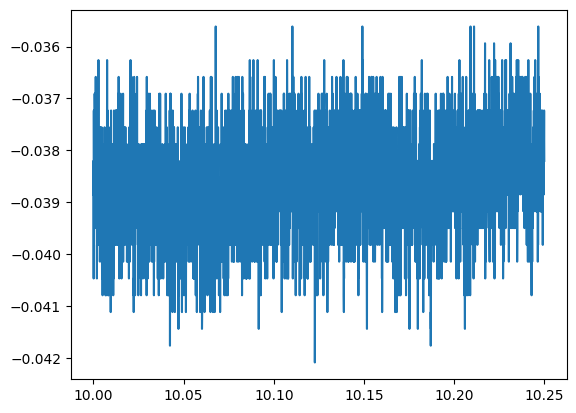

In [213]:
t, y = load_data("data/axial_dep_5_y2700_.npy", 0, 10, 10.25) # "filename", CH, start, stop
plt.plot(t, y)
plt.show()

## Radial position dependence

### Measurement

In [38]:
x_scan_values = np.linspace(63.8, 62.8, 6)
for x in x_scan_values:
    piezo_move(target_x=x, target_y=71, target_z=36.8)
    filename = f'500ms_100times_final_x{x:.2f}'
    res = measure_piezo_open(14, 100)
    with open(f'data/{filename}_.npy', 'wb') as f:
        np.save(f, res)

### Fitting

In [ ]:
results = analyze_snom_mi(
    filename="data/Test_scan_1480nm_/Test_2839.0_.npy",
    period_ms=500,
    start_time=0.18,
    end_time=0.22,
    save_prefix="500ms_100times_final_x62.80_fig",
    wavelength_nm=1388.25,
    save_csv="500ms_100times_final_x62.80_results.csv",
    show=False,
    n_rois=100,
    do_fft=False,
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Visualization

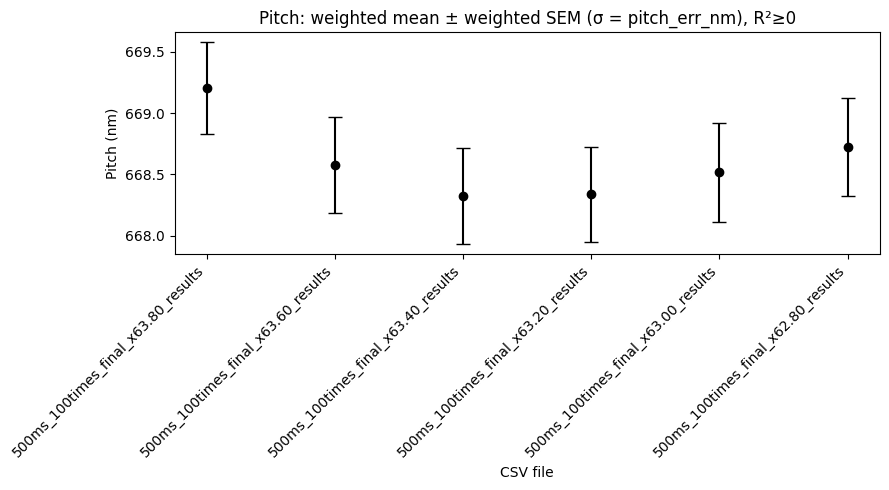

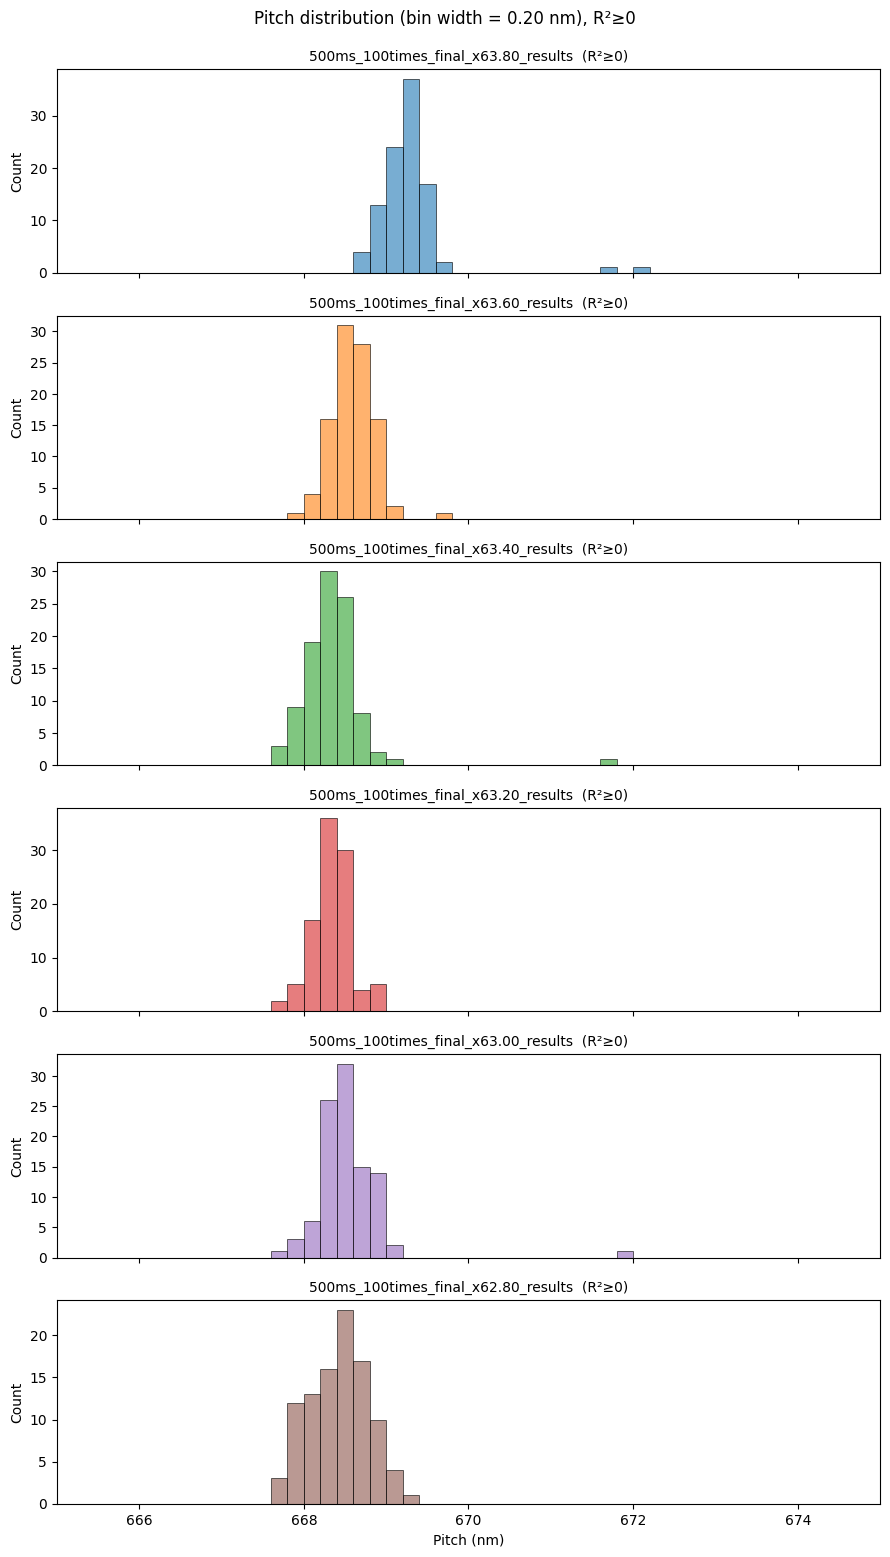

,file,r2_threshold,bin_width_nm,n_points_total,n_points_pass_r2,n_points_weighted,mean_pitch_nm_unweighted,std_pitch_nm_unweighted,mean_pitch_nm_weighted,sem_pitch_nm_weighted,weighting_method
0,500ms_100times_final_x63.80_results,0,0.2,100,100,100,669.083024,1.861367,669.204997,0.372290,weighted (sigma=pitch_err_nm)
1,500ms_100times_final_x63.60_results,0,0.2,100,100,100,668.521029,0.829925,668.577219,0.389416,weighted (sigma=pitch_err_nm)
2,500ms_100times_final_x63.40_results,0,0.2,100,100,100,668.250785,1.046337,668.323742,0.390065,weighted (sigma=pitch_err_nm)
3,500ms_100times_final_x63.20_results,0,0.2,100,100,100,668.312407,0.425521,668.337996,0.388631,weighted (sigma=pitch_err_nm)
4,500ms_100times_final_x63.00_results,0,0.2,100,100,100,668.522363,0.423746,668.516991,0.401005,weighted (sigma=pitch_err_nm)
5,500ms_100times_final_x62.80_results,0,0.2,100,100,100,672.652044,42.261901,668.723112,0.400035,weighted (sigma=pitch_err_nm)


In [45]:
file_name = ["data/500ms_100times_final_x63.80_/500ms_100times_final_x63.80_results.csv",
             "data/500ms_100times_final_x63.60_/500ms_100times_final_x63.60_results.csv",
             "data/500ms_100times_final_x63.40_/500ms_100times_final_x63.40_results.csv",
             "data/500ms_100times_final_x63.20_/500ms_100times_final_x63.20_results.csv",
             "data/500ms_100times_final_x63.00_/500ms_100times_final_x63.00_results.csv",
             "data/500ms_100times_final_x62.80_/500ms_100times_final_x62.80_results.csv",
]
plot_pitch_from_csv(file_name, r2_threshold=0)

# Fiber axis multiple points scan

### Z- and r- scan for tilt angle evaluation

In [46]:
# move piezo
piezo_move(target_x=0, target_y=70, target_z=55)

{'x': -0.05090904236, 'y': 69.99890137, 'z': 54.99333954}

In [97]:
# Find the fiber tilt angle in Z and XY-plane

# Move the motor stage to the start of the fiber axis (y = - 500 um)
# current_pos = stage_getpos() # make this position as 0
print(f"Current stage position: {current_pos} um")
stage_move(current_pos + 200)

# Implement z-scan and r-scan to find the absolute position of the fiber height and radial position

# Repeat this for y = 500 um

Current stage position: 3039 um


3239

In [105]:
# Z-scan
res = measure_piezo_sweep(ID="pos3", scan_axis='z', scan_values=np.linspace(52, 62, 101), const_x=79, const_y=70)
path = res['npz_path']
res_ana = analyze_gaussian(path)
plt.show()

[rep 1/1] [1/101] z=52.000 um  elapsed=0.26s
[rep 1/1] [51/101] z=57.000 um  elapsed=6.30s
[rep 1/1] [101/101] z=62.000 um  elapsed=12.03s
Data saved to: data\20251008_175726_pos3\20251008_175726_pos3_z.npz


In [106]:
# r-scan
res = measure_piezo_sweep(ID="test", scan_axis='x', scan_values=np.linspace(78, 79, 50), const_z=59.2, const_y=70)
path = res['npz_path']
res_ana = analyze_gaussian(path)
plt.show()

[rep 1/1] [1/50] x=78.000 um  elapsed=0.24s
[rep 1/1] [50/50] x=79.000 um  elapsed=6.02s
Data saved to: data\20251008_175948_test\20251008_175948_test_x.npz


In [ ]:
current_pos = 3039
# Tilt angle calculation
stage_position = np.linspace(-200, 200, 10) + current_pos
z_start = 56.6
z_end = 59.2
r_start = 77.6
r_end = 79

z_pos, r_pos = angle_estimation(z_start, z_end, r_start, r_end, stage_position)

Tilt angle in Z-plane: 0.37 deg
Tilt angle in R-plane: 0.20 deg


### Multiple points scans along the fiber axis

In [23]:
foldername = 'Test_scan_1480nm_third_trial'
filename = 'Test'
multiple_points_scan(foldername, filename, stage_position, z_pos, r_pos, N=30)


Stage moved to: 2839.0 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_0.npy
Stage moved to: 2883.4444444444443 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_1.npy
Stage moved to: 2927.8888888888887 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_2.npy
Stage moved to: 2972.3333333333335 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_3.npy
Stage moved to: 3016.777777777778 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_4.npy
Stage moved to: 3061.222222222222 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_5.npy
Stage moved to: 3105.6666666666665 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_6.npy
Stage moved to: 3150.1111111111113 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_7.npy
Stage moved to: 3194.5555555555557 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_8.npy
Stage moved to: 3239.0 um
Data saved to: data/Test_scan_1480nm_third_trial/Test_9.npy
